# S&P Case-Schiller Home Price Index Prediction

In [1]:
# Importing liberaries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10,6

In [2]:
# Filtering warnings 
import warnings 
warnings.filterwarnings('ignore','statsmodels.tsa.arima_model.arma', FutureWarning)

In [3]:
# Importing dataset 
df= pd.read_csv(r'C:\Users\imaks\Desktop\Folder\work\Projects\machine learning\CSUSHPISA.csv')

In [4]:
df.head(5)

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.735
3,1987-04-01,65.131
4,1987-05-01,65.563


In [5]:
df.shape

(438, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       438 non-null    object 
 1   CSUSHPISA  438 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.0+ KB


In [7]:
df.describe()

,CSUSHPISA
count,438.000000
mean,140.763870
std,59.803531
min,63.965000
25%,82.013000
50%,140.265000
75%,178.094500
max,304.817000


In [8]:
# Checking for missing values 
df.isnull().sum()

DATE         0
CSUSHPISA    0
dtype: int64

In [9]:
# Date range 

df.loc[:,"DATE"][0], df.loc[:,"DATE"] [len(df)-1]

('1987-01-01', '2023-06-01')

In [10]:
# Parser string to datetime type 
df['DATE'] = pd.to_datetime(df['DATE'], infer_datetime_format=True)

# Setting date column as index 
indexed_data = df.set_index(['DATE'])

In [11]:
# Reading first 5 rows 
from datetime import datetime
indexed_data.head(5)

,CSUSHPISA
DATE,
1987-01-01,63.965
1987-02-01,64.424
1987-03-01,64.735
1987-04-01,65.131
1987-05-01,65.563


In [12]:
# Reading last five rows 
from datetime import datetime 
indexed_data.tail(5)

,CSUSHPISA
DATE,
2023-02-01,296.958
2023-03-01,298.210
2023-04-01,300.214
2023-05-01,302.657
2023-06-01,304.635


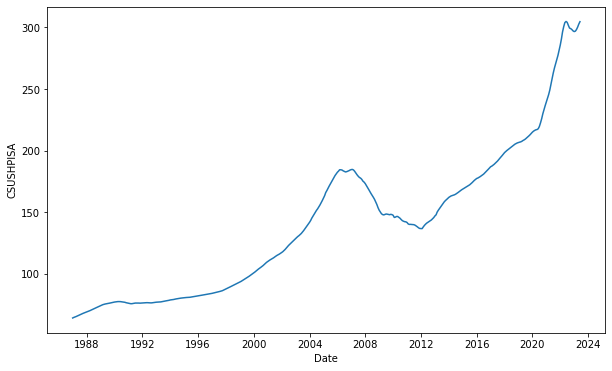

In [13]:
# Plotting a Graph

plt.xlabel("Date")
plt.ylabel("CSUSHPISA")

plt.plot(indexed_data)

 #### From the plot we infer that the data is not stationary . Hence, we determine rolling statistics

In [14]:
# Determining rolling statistics 

rol_mean = indexed_data.rolling(window=12).mean()

## As the data has been recorded on monthly basis there fore the mean will be calculated over 12 months. hence windowed 12 months.

In [15]:
# Determining rolling standard deviation
rol_std= indexed_data.rolling(window=12).std()
print(rol_mean, rol_std)

             CSUSHPISA
DATE                  
1987-01-01         NaN
1987-02-01         NaN
1987-03-01         NaN
1987-04-01         NaN
1987-05-01         NaN
...                ...
2023-02-01  299.900250
2023-03-01  300.061833
2023-04-01  300.027583
2023-05-01  299.923667
2023-06-01  299.908500

[438 rows x 1 columns]             CSUSHPISA
DATE                 
1987-01-01        NaN
1987-02-01        NaN
1987-03-01        NaN
1987-04-01        NaN
1987-05-01        NaN
...               ...
2023-02-01   3.093852
2023-03-01   2.933557
2023-04-01   2.928779
2023-05-01   2.797935
2023-06-01   2.769346

[438 rows x 1 columns]


#### Plotting rolling statistics

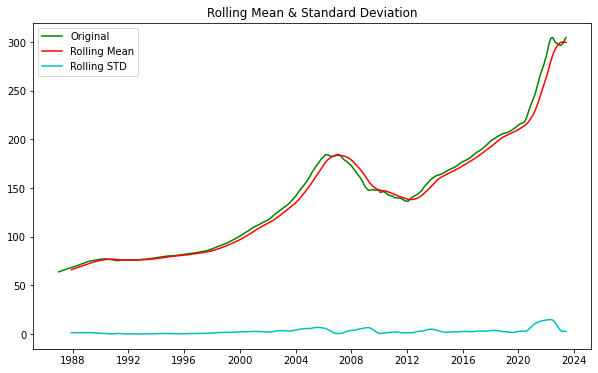

In [16]:
# Plotting the rolling statistics , mean as red and std as black 

orignal = plt.plot(indexed_data , color='g', label='Original')
mean= plt.plot(rol_mean, color = 'r', label= 'Rolling Mean')
std= plt.plot(rol_std, color= 'c', label= 'Rolling STD')

plt.legend(loc= 0 )

plt.title('Rolling Mean & Standard Deviation')

plt.show(block= False)

#### The plot depicts that mean and std are not constant therefore the data in non stationary

### Performing Dickey-fuller test 

In [17]:
from statsmodels.tsa.stattools import adfuller 
print('Results of Dickey-Fuller test : ')
dftest= adfuller(indexed_data['CSUSHPISA'], autolag= 'AIC')

dfout = pd.Series(dftest[0:4], index = ['Test Statistics','P-Value', '#Lags Used', 'No. of observations Used'])
for key, value in dftest[4].items():
        dfout['Critical Value (%s)'%key]= value

print(dfout)

Results of Dickey-Fuller test : 
Test Statistics               1.028806
P-Value                       0.994561
#Lags Used                   18.000000
No. of observations Used    419.000000
Critical Value (1%)          -3.446054
Critical Value (5%)          -2.868463
Critical Value (10%)         -2.570458
dtype: float64


#### P value is greater than 0.05 hence  it's non stationary so we go on finding order of diffrencing 

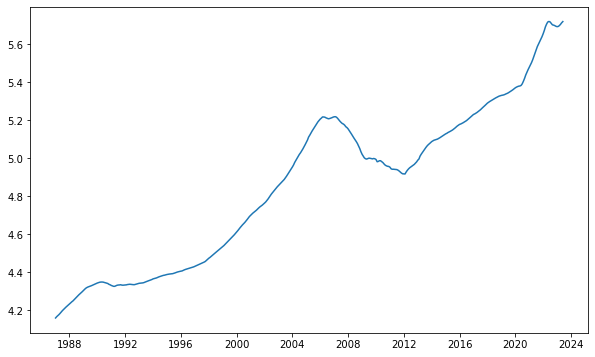

In [18]:
# Esitmating Trend 

indexed_log_data = np.log(indexed_data)
plt.plot(indexed_log_data)

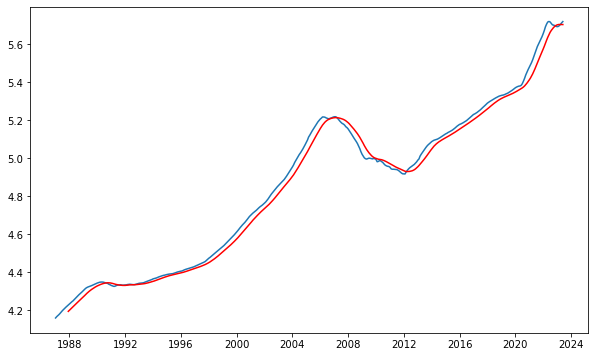

In [19]:
# Calculating Moving average and Moving standard deviation

movingavg= indexed_log_data.rolling(window=12).mean()

movingSTD= indexed_log_data.rolling(window= 12).std()

plt.plot(indexed_log_data)
plt.plot(movingavg, color='red')


In [20]:
datasetLogScaleMinusMovingAverage = indexed_log_data - movingavg
datasetLogScaleMinusMovingAverage.head(12)

# Remove Nan Values

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(5)

,CSUSHPISA
DATE,
1987-12-01,0.033694
1988-01-01,0.032691
1988-02-01,0.032507
1988-03-01,0.031837
1988-04-01,0.030687


In [21]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    moving_avg = timeseries.rolling(window= 12).mean()
    moving_std = timeseries.rolling(window= 12).std()
    
    
    # Ploting statistics 
    
    original = plt.plot(timeseries, color ='blue' , label = 'Original')
    mean= plt.plot(moving_avg, color='red',  label = 'Mean')
    std= plt.plot(moving_std, color='green', label= 'STD')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block= False)
    
    print ('Result of Dickey-Fuller test:')
    
    dftest= adfuller(timeseries['CSUSHPISA'], autolag= 'AIC')
    dfoutput= pd.Series(dftest[0:4], index= ['Test Statistics', 'P-Value','#Lags Used', 'Number of observations Used '])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value

    print(dfoutput)

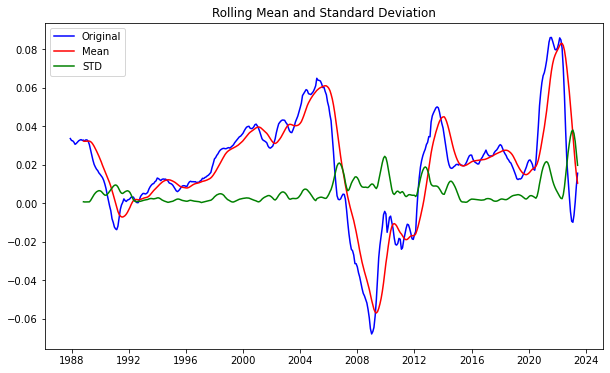

Result of Dickey-Fuller test:
Test Statistics                  -3.004939
P-Value                           0.034436
#Lags Used                       14.000000
Number of observations Used     412.000000
Critical Value (1%)              -3.446322
Critical Value (5%)              -2.868581
Critical Value (10%)             -2.570521
dtype: float64


In [22]:
test_stationarity(datasetLogScaleMinusMovingAverage)

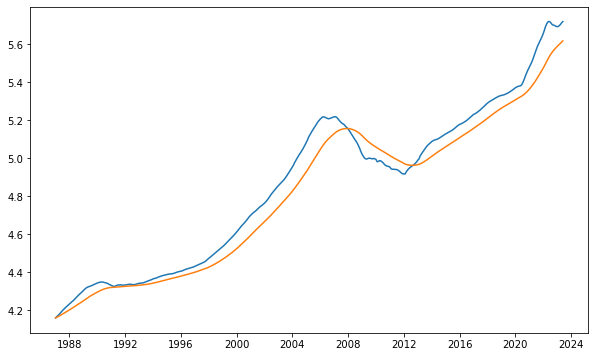

In [23]:
# calculating Weighted average of the series 

WeightedAverage = indexed_log_data.ewm(halflife= 12 , min_periods =0, adjust= True).mean()
plt.plot(indexed_log_data)
plt.plot(WeightedAverage)

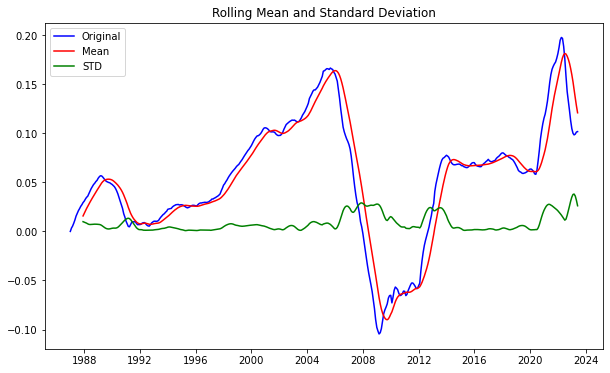

Result of Dickey-Fuller test:
Test Statistics                  -2.535829
P-Value                           0.106998
#Lags Used                       14.000000
Number of observations Used     423.000000
Critical Value (1%)              -3.445904
Critical Value (5%)              -2.868397
Critical Value (10%)             -2.570423
dtype: float64


In [24]:
LogScaleMinusMovingExponetialDecayAverage = indexed_log_data - WeightedAverage
test_stationarity(LogScaleMinusMovingExponetialDecayAverage)

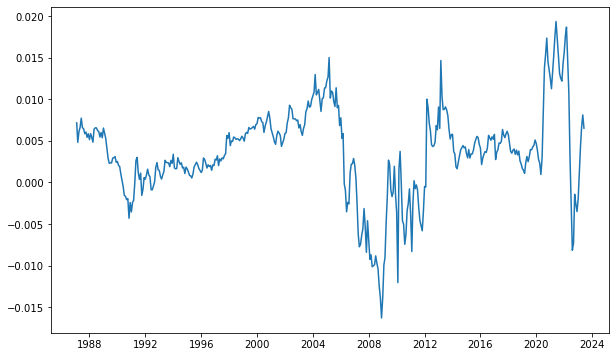

In [25]:
LogDiffShifting = indexed_log_data - indexed_log_data.shift()
plt.plot(LogDiffShifting)

### Decomposing Time series 

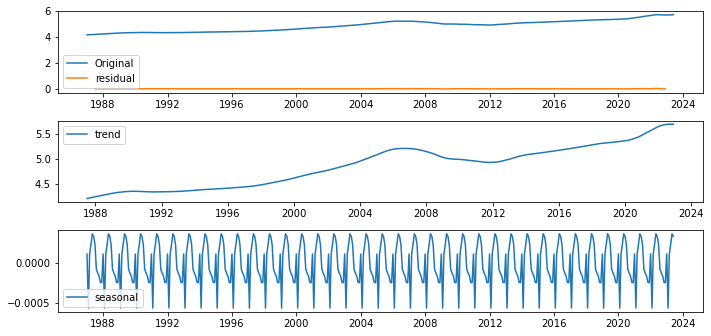

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompostion = seasonal_decompose(indexed_log_data)

trend = decompostion.trend
seasonal = decompostion.seasonal
residual = decompostion.resid

plt.subplot(411)
plt.plot(indexed_log_data, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'seasonal')
plt.legend(loc = 'best')
plt.subplot(411)
plt.plot(residual, label = 'residual')
plt.legend(loc = 'best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)

In [27]:
LogDiffShifting.dropna(inplace = True)

### Diagnosing ACF and PACF plots to get value for P and q

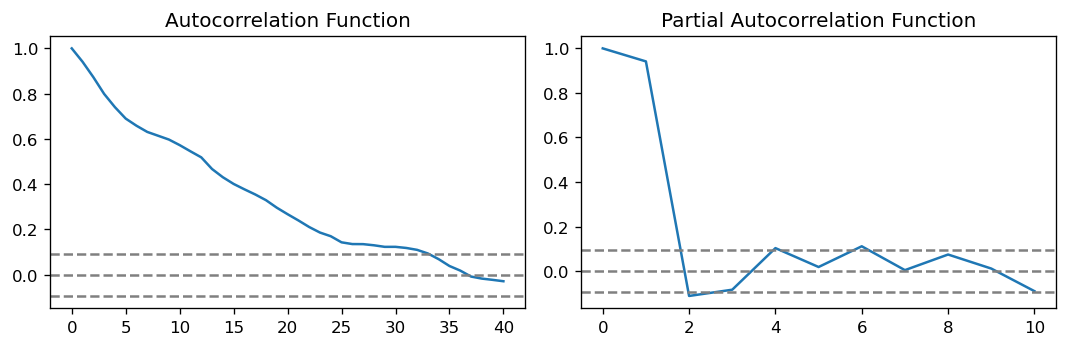

In [73]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(LogDiffShifting, nlags = 40)
lag_pacf = pacf(LogDiffShifting, nlags = 10, method = 'ols')

# plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(LogDiffShifting)), linestyle = '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(LogDiffShifting)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(LogDiffShifting)), linestyle = '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(LogDiffShifting)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

In [80]:
from statsmodels.tsa.arima.model import ARIMA

#AR Model 
model = ARIMA(indexed_log_data, order = (0, 1, 2))
results_AR = model.fit()
results_AR.summary()

C:\Users\imaks\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\imaks\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\imaks\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\imaks\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              CSUSHPISA   No. Observations:                  438
Model:                 ARIMA(0, 1, 2)   Log Likelihood                1947.790
Date:                Thu, 21 Sep 2023   AIC                          -3889.581
Time:                        01:09:12   BIC                          -3877.341
Sample:                    01-01-1987   HQIC                         -3884.751
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.2233      0.033     37.235      0.000       1.159       1.288
ma.L2          0.7007      0.030     23.316      0.000       0.642       0.760
sigma2      7.826e-06   4.08e-07     19.185      0.000    7.03e-06    8.63e-06
===================================================================================
Ljung-Box (L1) (Q):                  18.89   Jarque-Bera (JB):               134.22
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.32   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Plotting AR Model


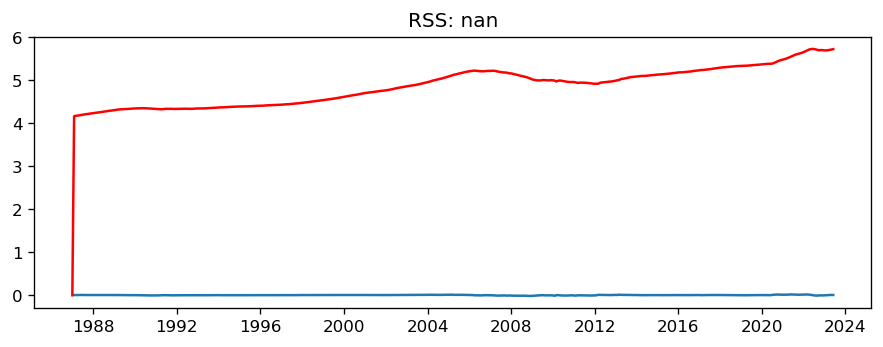

In [79]:
plt.plot(LogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-LogDiffShifting["CSUSHPISA"])**2))
print('Plotting AR Model')

Plotting MA Model


C:\Users\imaks\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\imaks\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\imaks\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\imaks\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


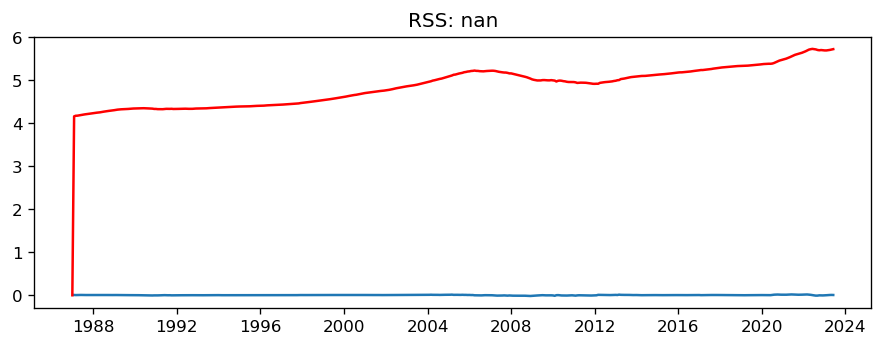

In [71]:
#MA Model 
model = ARIMA(indexed_log_data, order = (2, 1, 0))
results_MA = model.fit()
plt.plot(LogDiffShifting)
plt.plot(results_MA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-LogDiffShifting["CSUSHPISA"])**2))
print('Plotting MA Model')

C:\Users\imaks\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\imaks\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\imaks\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting ARIMA Model


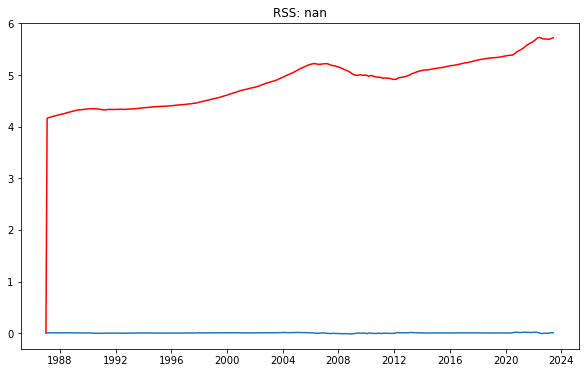

In [39]:
#ARIMA Model 
model = ARIMA(indexed_log_data, order = (2, 1, 2))
results_ARIMA = model.fit()
plt.plot(LogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-LogDiffShifting["CSUSHPISA"])**2))
print('Plotting ARIMA Model')

In [60]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy = True)
print(predictions_ARIMA_diff.head())

DATE
1987-01-01    0.000000
1987-02-01    4.158336
1987-03-01    4.172345
1987-04-01    4.174651
1987-05-01    4.182175
dtype: float64


In [61]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

DATE
1987-01-01     0.000000
1987-02-01     4.158336
1987-03-01     8.330681
1987-04-01    12.505333
1987-05-01    16.687508
dtype: float64


In [65]:
predictions_ARIMA_log = pd.Series(indexed_log_data['CSUSHPISA'][10],index = indexed_log_data.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value = 0)
predictions_ARIMA_log.head()

DATE
1987-01-01     4.221065
1987-02-01     8.379401
1987-03-01    12.551747
1987-04-01    16.726398
1987-05-01    20.908573
dtype: float64

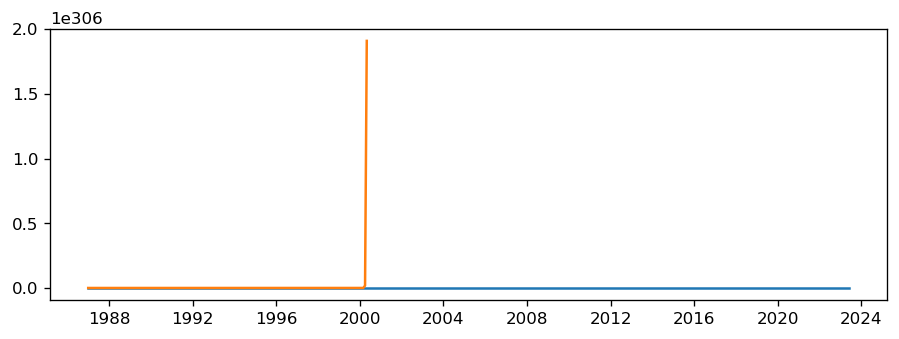

In [76]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexed_data)
plt.plot(predictions_ARIMA)

In [81]:
indexed_log_data

,CSUSHPISA
DATE,
1987-01-01,4.158336
1987-02-01,4.165486
1987-03-01,4.170302
1987-04-01,4.176401
1987-05-01,4.183012
...,...
2023-02-01,5.693591
2023-03-01,5.697798
2023-04-01,5.704496


In [86]:
results_ARIMA.plot_predict(1, 646)

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

In [83]:
results_ARIMA.plot_predict(1, 486)

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

In [84]:
results_ARIMA.forecast(steps = 486)

2023-07-01    5.725196
2023-08-01    5.730801
2023-09-01    5.736112
2023-10-01    5.741124
2023-11-01    5.745856
                ...   
2063-08-01    5.825948
2063-09-01    5.825948
2063-10-01    5.825948
2063-11-01    5.825948
2063-12-01    5.825948
Freq: MS, Name: predicted_mean, Length: 486, dtype: float64